In [1]:
import matplotlib.pyplot as plt
import pandas as pd
from lifelines import KaplanMeierFitter

## 11.3 The Kaplan-Meier Survival Curve


In [2]:
df_cancer = pd.read_csv('../data/brain_cancer.csv')

In [3]:
df_cancer.head()

,sex,diagnosis,loc,ki,gtv,stereo,status,time
0,Female,Meningioma,Infratentorial,90,6.11,SRS,0,57.64
1,Male,HG glioma,Supratentorial,90,19.35,SRT,1,8.98
2,Female,Meningioma,Infratentorial,70,7.95,SRS,0,26.46
3,Female,LG glioma,Supratentorial,80,7.61,SRT,1,47.80
4,Male,HG glioma,Supratentorial,90,5.06,SRT,1,6.30


Most software, including R, uses the convention that status = 1 indicates an uncensored observation, and status = 0 indicates a censored observation. 

In [4]:
df_cancer.status.value_counts()

0    53
1    35
Name: status, dtype: int64

In [5]:
num_survive_20 = df_cancer.query("time >= 20").shape[0]
num_survive_20

48

In [6]:
censor_before_20 = df_cancer.query("time < 20 & status == 0").shape[0]
censor_before_20

17

In [7]:
num_not_censor = df_cancer.query("status == 1").shape[0]
num_survive_20 + num_not_censor - df_cancer.query("time >= 20 & status == 1").shape[0]

71

In [8]:
kmf = KaplanMeierFitter()

In [9]:
kmf.fit(df_cancer['time'], event_observed=df_cancer['status'])

<lifelines.KaplanMeierFitter:"KM_estimate", fitted with 88 total observations, 53 right-censored observations>

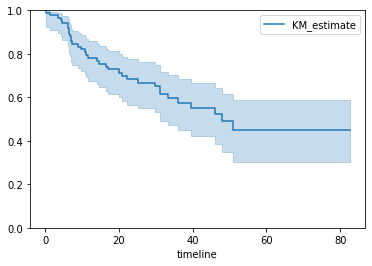

In [10]:
kmf.plot_survival_function()
plt.ylim([0, 1])
plt.show()